# Number of people in hospitals by genders and statistical regions

We used another dataset where we get the hospital occupancy based on genders and the statistical regions. We have 13 different statistical regions and 4 different genders that are tracked from year 2003 till 2019.

In [127]:
from pyaxis import pyaxis
import matplotlib.pyplot as plt
import numpy as np

URL = "https://podatki.nijz.si/DB/NIJZ%20podatkovni%20portal/4%20Zdravstveno%20varstvo/06%20Bolni%C5%A1ni%C4%8Dne%20obravnave/1%20Hospitalizacije%20zaradi%20bolezni/BO01.px"
px = pyaxis.parse(URL, encoding='ANSI')
data = px['DATA']

print(data)

      Leto           Spol    Statistièna regija    DATA
0     2003  Spol - SKUPAJ             SLOVENIJA  256405
1     2003  Spol - SKUPAJ              Pomurska   18539
2     2003  Spol - SKUPAJ             Podravska   39421
3     2003  Spol - SKUPAJ               Koroška   11181
4     2003  Spol - SKUPAJ             Savinjska   36549
...    ...            ...                   ...     ...
1185  2019        Neznano             Gorenjska       0
1186  2019        Neznano  Primorsko-notranjska       0
1187  2019        Neznano               Goriška       0
1188  2019        Neznano         Obalno-kraška       0
1189  2019        Neznano                Tujina       0

[1190 rows x 4 columns]


In [72]:
spol = data['Spol'].values
dataset = data['DATA'].values
regija = data['Statistièna regija'].values
leto = data['Leto'].values

In [43]:

spollist= []
for i in spol:
    spollist.append(i)
spollist = list(set(spollist))
    

In [70]:
porazdelitev1 = [0] * len(spollist)
diction = {}
i=0
for spol1 in spollist:
    if spol1 != ('Spol - SKUPAJ'):
        for j in range(0,len(spol)):
            if spol1 == spol[j]:
                porazdelitev1[i] += int(dataset[j])
        diction[spol1] = porazdelitev1[i]
        i+=1


We compared the occupancy based on genders and we can see  that in the hospital in the past 15 years, more percentage of  the occupancy goes to women also undetermined and unknown are not significally important 

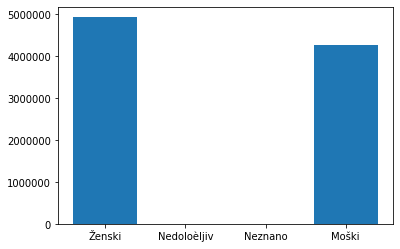

In [85]:
plt.bar(list(diction.keys()), list(diction.values()))
plt.show()

In [88]:
letolist =[]
for i in leto:
    letolist.append(i)
letolist = list(set(letolist))
zenski=dict()
moski=dict()
count=0
count1=0
for letoq in letolist:
    for j in range(0,len(leto)):
        if letoq == leto[j] and spol[j] == 'Ženski':
            count += int(dataset[j])
        if letoq == leto[j] and spol[j] == 'Moški':
            count1 += int(dataset[j])
    letoq=int(letoq)
    zenski[letoq] = count
    moski[letoq] = count1
zenski = dict(sorted(zenski.items()))
moski = dict(sorted(moski.items()))

            
    

In this part we created a graph of the previous 15 years to compare the occupancy between the men and women and we can see that almost every year the occupancy by the women is higher than the occupancy of the men, also there are years that are quite close almost equal


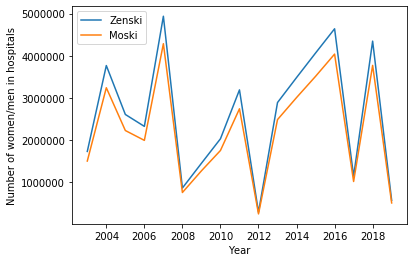

In [90]:

plt.plot(list(zenski.keys()), list(zenski.values()),label = "Zenski")
plt.plot(list(moski.keys()), list(moski.values()),label = "Moski")
plt.xlabel('Year')
plt.ylabel('Number of women/men in hospitals')
plt.legend()
plt.show()

In [ ]:
#Pol vs Statisticna regija 

In [92]:
counttot=0
dictot = dict()
for letoq in letolist:
    for j in range(0,len(leto)):
        if letoq == leto[j] and spol[j] == 'Spol - SKUPAJ' and regija[j]== 'SLOVENIJA':
            counttot += int(dataset[j])
    letoq=int(letoq)
    dictot[letoq] = counttot
dictot = dict(sorted(dictot.items()))


{2003: 1620182, 2004: 3505052, 2005: 2419398, 2006: 2161541, 2007: 4610197, 2008: 814620, 2009: 1363777, 2010: 1894998, 2011: 2967919, 2012: 274946, 2013: 2690149, 2014: 3246387, 2015: 3788497, 2016: 4338552, 2017: 1084803, 2018: 4058810, 2019: 545088}


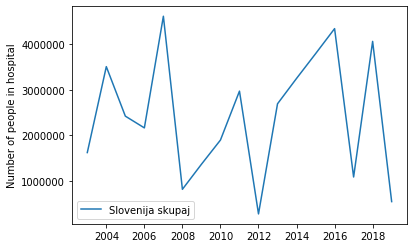

In [95]:
plt.plot(list(dictot.keys()), list(dictot.values()),label = "Slovenija skupaj")
plt.ylabel('Number of people in hospital')
plt.legend()
plt.show()

In [100]:
regijalist= []
for i in regija:
    regijalist.append(i)
regijalist = list(set(regijalist))
print(regijalist)

['Primorsko-notranjska', 'Podravska', 'Zasavska', 'Koroška', 'Pomurska', 'Osrednjeslovenska', 'SLOVENIJA', 'Tujina', 'Gorenjska', 'Goriška', 'Obalno-kraška', 'Savinjska', 'Posavska', 'Jugovzhodna Slovenija']


In [130]:
countreg=0
dictreg = dict()
for regija1 in regijalist:
    if regija1 != ('SLOVENIJA'):
        for j in range(0,len(regija)):
            if regija1 == regija[j]:
               
                countreg += int(dataset[j])
        dictreg[regija1] = countreg
        countreg=0
dictreg = dict(sorted(dictreg.items()))

In this part we made a comparison of the occupancy between the statistical regions and we can see that the region "Osrednjoslovenska" is the most occupied, after it come "Podravska" and "Savinjska". The least occupied is the statistical region "Tujina" which says that most of the slovenian people are treated in slovenian hospitals

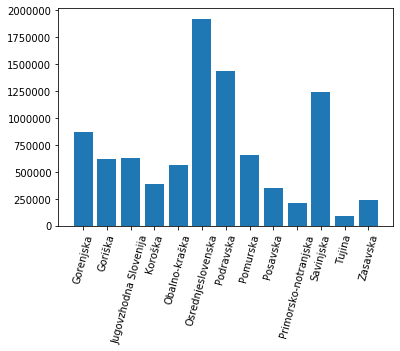

In [144]:
index = np.arange(len(list(dictreg.keys())))
plt.bar(list(dictreg.keys()), list(dictreg.values()))
plt.xticks(index, list(dictreg.keys()) , fontsize=10, rotation=75)
plt.show()


In [142]:
countgrm=0
countgrz=0
dictgr = dict()
for regija1 in regijalist:
    if regija1 != ('SLOVENIJA'):
        for j in range(0,len(regija)):
            if regija1 == regija[j] and spol[j] == "Ženski":
                countgrz += int(dataset[j])
            if regija1 == regija[j] and spol[j] == "Moški":
                countgrm += int(dataset[j])      
        dictgr[regija1] = (countgrz, countgrm)
        countgrz=0
        countgrm=0
print(dictgr)
print(len(dictgr))

{'Primorsko-notranjska': (53049, 49965), 'Podravska': (392258, 328481), 'Zasavska': (62980, 54858), 'Koroška': (101540, 91637), 'Pomurska': (181547, 147205), 'Osrednjeslovenska': (514768, 447290), 'Tujina': (22553, 22782), 'Gorenjska': (237114, 198985), 'Goriška': (161054, 147189), 'Obalno-kraška': (152237, 129278), 'Savinjska': (334265, 287490), 'Posavska': (91636, 83888), 'Jugovzhodna Slovenija': (162636, 153439)}
13


Also we compared the males and females based on the statistical regions and we can see that in almost every region there are more women in the hospital than the men 

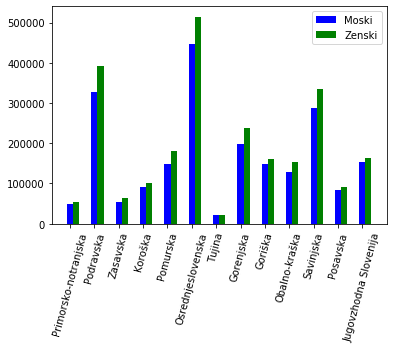

In [146]:
m = []
z = []

for val in dictgr.values():
    m.append(val[1])
    z.append(val[0])
X = np.arange(len(m))
plt.bar( X+ 0.00, m, color = 'b', width = 0.25, label="Moski")
plt.bar(X + 0.25, z, color = 'g', width = 0.25, label = "Zenski")
plt.xticks(X, list(dictgr.keys()) , fontsize=10, rotation=75)
plt.legend()
plt.show()
